In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from clustergram import Clustergram
import urbangrammar_graphics as ugg
import seaborn as sns

In [ ]:
df = pd.read_csv("data/segmentation_data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
df = df.drop("ID", axis=1)

In [ ]:
df.shape

(2000, 7)

In [ ]:
scaler = StandardScaler()
df_ss = scaler.fit_transform(df)

In [ ]:
df_ss

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [ ]:
tsne = TSNE(n_components=2)
df_tsne = tsne.fit_transform(df_ss)

/Users/e.sumina/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/e.sumina/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


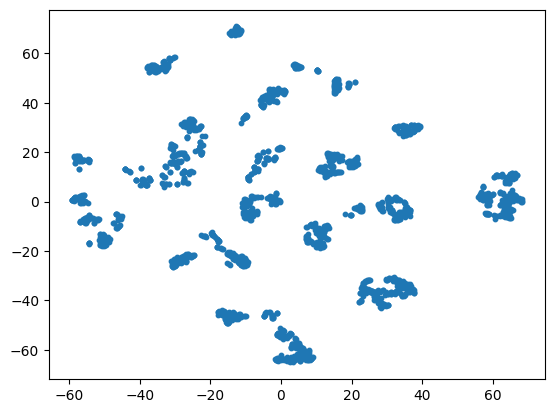

In [ ]:
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10)

In [ ]:
clustering = AgglomerativeClustering().fit(df_ss)
np.unique(clustering.labels_)

array([0, 1])

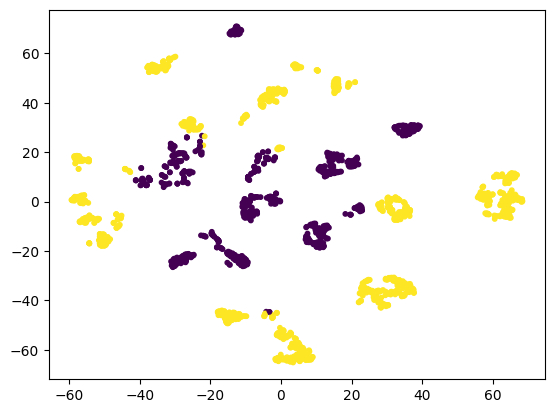

In [ ]:
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, c=clustering.labels_)

In [ ]:
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(df_ss)

In [ ]:
np.unique(clustering.labels_)

array([   0,    1,    2, ..., 1997, 1998, 1999])

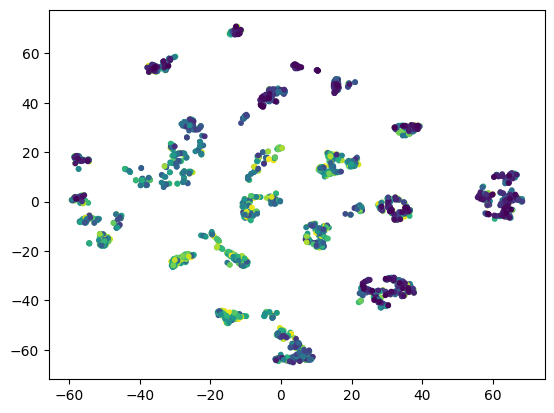

In [ ]:
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, c=clustering.labels_)

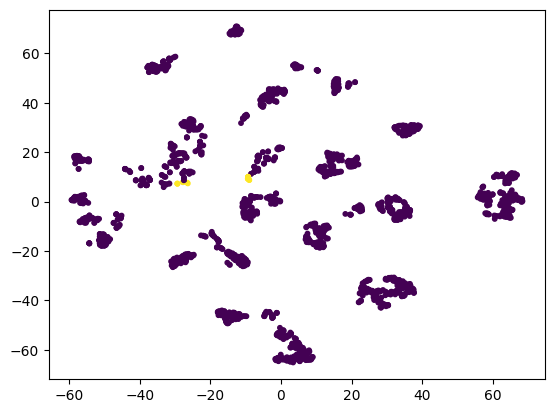

In [ ]:
clustering = AgglomerativeClustering(linkage='average').fit(df_ss)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, c=clustering.labels_)

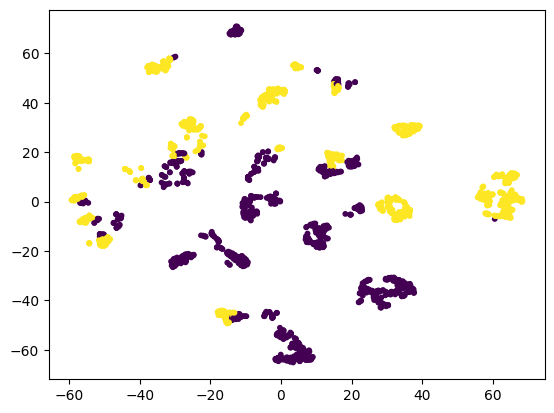

In [ ]:
clustering = AgglomerativeClustering(linkage='complete').fit(df_ss)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, c=clustering.labels_)

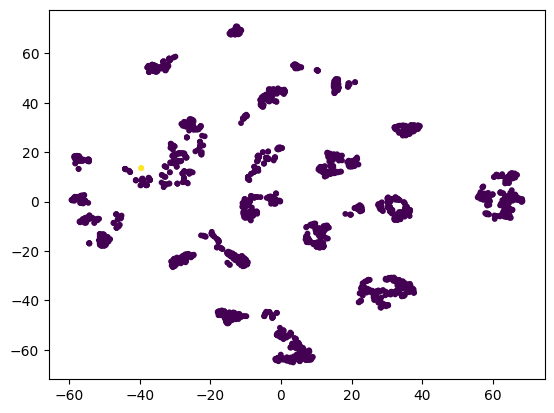

In [ ]:
clustering = AgglomerativeClustering(linkage='single').fit(df_ss)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, c=clustering.labels_)

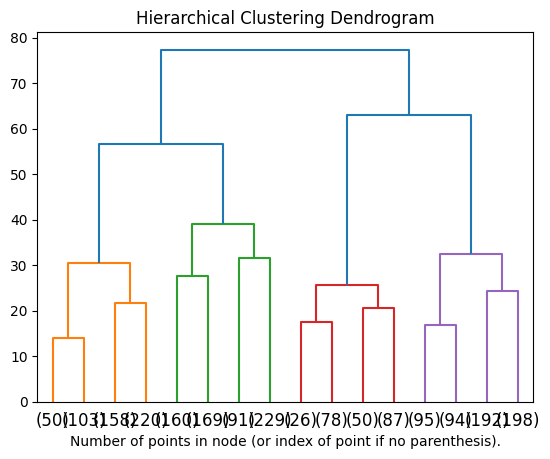

In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_ss)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

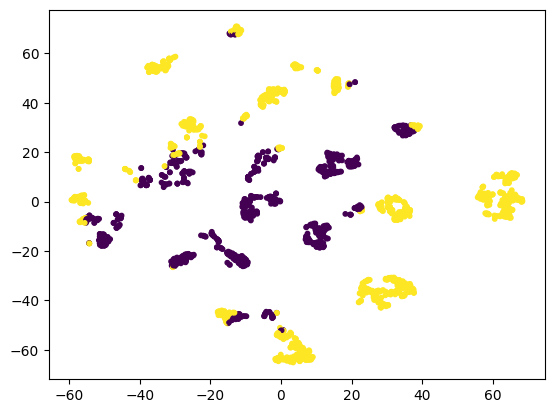

In [ ]:
kmeans = KMeans(n_clusters=2).fit(df_ss)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, c=kmeans.labels_)

In [ ]:
inertia = []
silhouette = []
N = 15
for k in range(2, N):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_ss)
    preds = kmeans.predict(df_ss)
    inertia.append(np.sqrt(kmeans.inertia_))
    silhouette.append(silhouette_score(df_ss, preds))

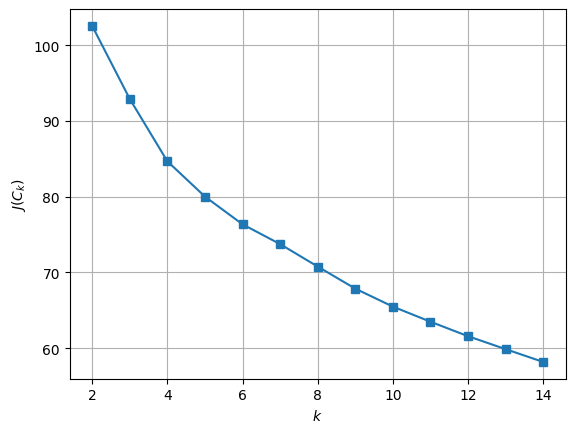

In [ ]:
plt.plot(range(2, N), inertia, marker='s');
plt.xlabel('$k$')
plt.grid()
plt.ylabel('$J(C_k)$');

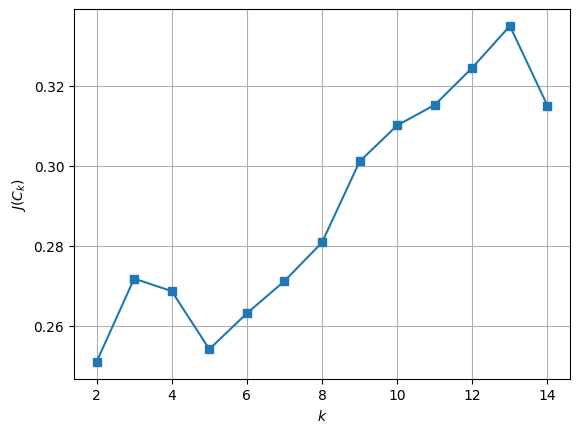

In [ ]:
plt.plot(range(2, N), silhouette, marker='s');
plt.xlabel('$k$')
plt.grid()
plt.ylabel('$J(C_k)$');

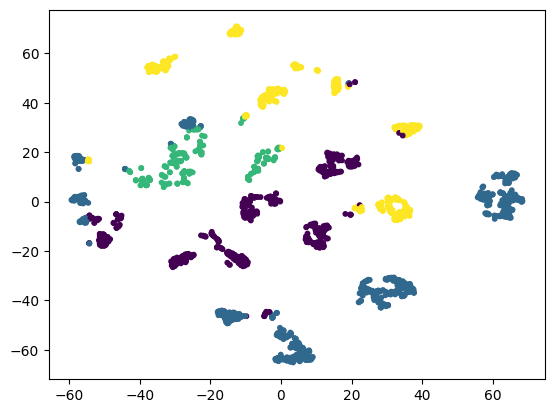

In [ ]:
kmeans = KMeans(n_clusters=4).fit(df_ss)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, c=kmeans.labels_)

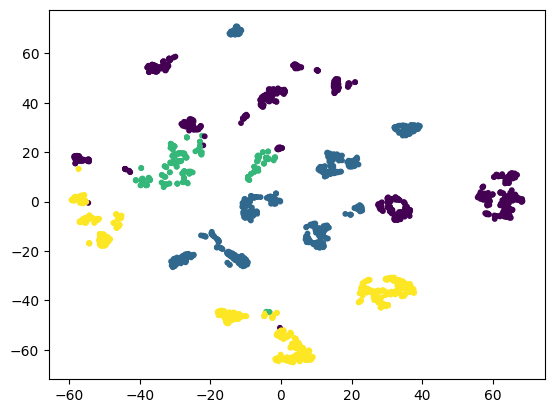

In [ ]:
clustering = AgglomerativeClustering(n_clusters=4).fit(df_ss)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, c=clustering.labels_)

/Users/e.sumina/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


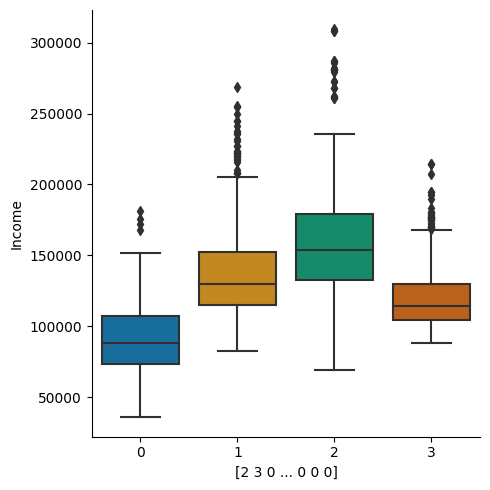

In [ ]:
sns.catplot(kind='box', data=df,
            y='Income',
            x=clustering.labels_,
            palette="colorblind", sharey=False)
plt.tight_layout()
plt.show()

/Users/e.sumina/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


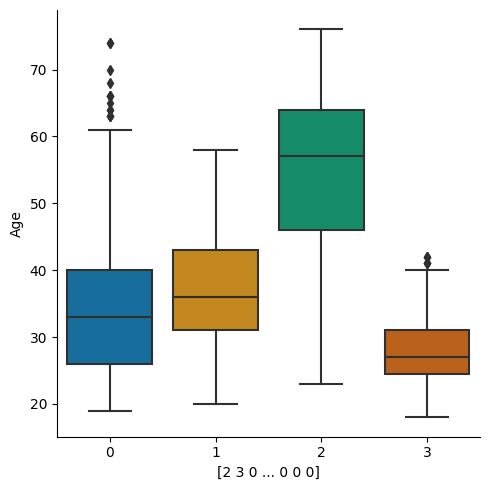

In [ ]:
sns.catplot(kind='box', data=df,
            y='Age',
            x=clustering.labels_,
            palette="colorblind", sharey=False)
plt.tight_layout()
plt.show()

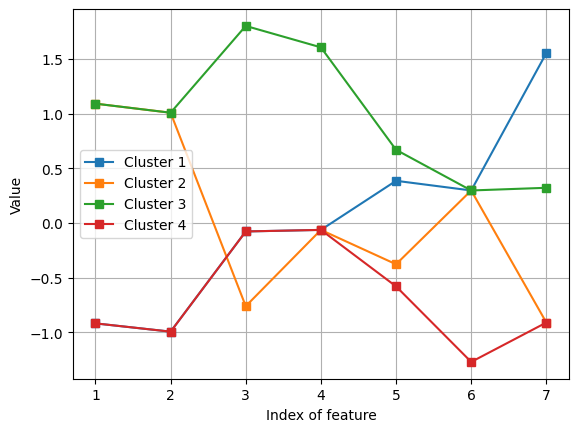

In [ ]:
plt.plot(range(1, df_ss.shape[1]+1), np.median(df_ss[kmeans.labels_ == 0], axis=0), marker='s', label="Cluster 1");
plt.plot(range(1, df_ss.shape[1]+1), np.median(df_ss[kmeans.labels_ == 1], axis=0), marker='s', label="Cluster 2");
plt.plot(range(1, df_ss.shape[1]+1), np.median(df_ss[kmeans.labels_ == 2], axis=0), marker='s', label="Cluster 3");
plt.plot(range(1, df_ss.shape[1]+1), np.median(df_ss[kmeans.labels_ == 3], axis=0), marker='s', label="Cluster 4");
plt.legend()
plt.xlabel('Index of feature')
plt.grid()
plt.ylabel('Value');

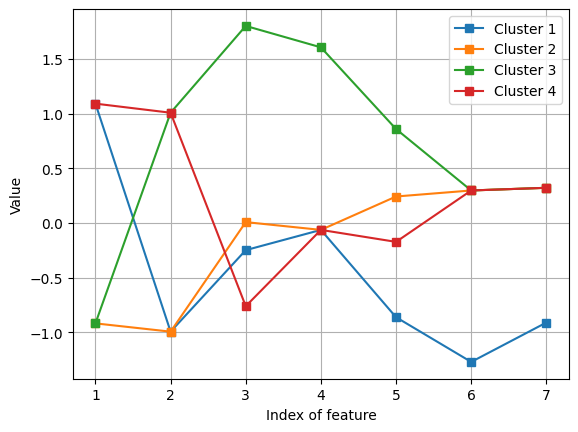

In [ ]:
plt.plot(range(1, df_ss.shape[1]+1), np.median(df_ss[clustering.labels_ == 0], axis=0), marker='s', label="Cluster 1");
plt.plot(range(1, df_ss.shape[1]+1), np.median(df_ss[clustering.labels_ == 1], axis=0), marker='s', label="Cluster 2");
plt.plot(range(1, df_ss.shape[1]+1), np.median(df_ss[clustering.labels_ == 2], axis=0), marker='s', label="Cluster 3");
plt.plot(range(1, df_ss.shape[1]+1), np.median(df_ss[clustering.labels_ == 3], axis=0), marker='s', label="Cluster 4");
plt.legend()
plt.xlabel('Index of feature')
plt.grid()
plt.ylabel('Value');

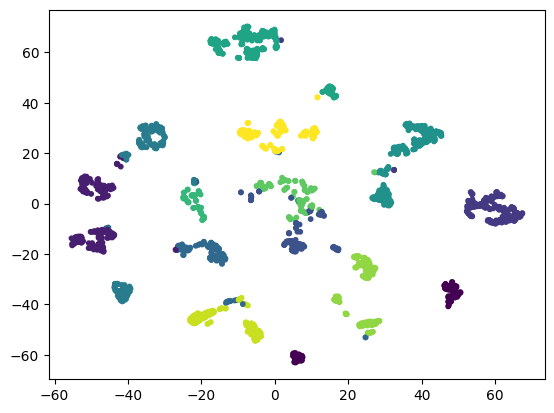

In [ ]:
kmeans = KMeans(n_clusters=13).fit(df_ss)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, c=kmeans.labels_)

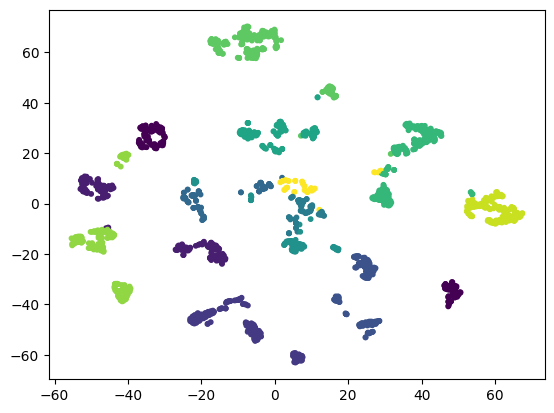

In [ ]:
clustering = AgglomerativeClustering(n_clusters=13).fit(df_ss)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, c=clustering.labels_)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 4.670180082321167 seconds.
K=3 fitted in 7.424606084823608 seconds.
K=4 fitted in 8.698369026184082 seconds.
K=5 fitted in 10.12928295135498 seconds.
K=6 fitted in 9.49226188659668 seconds.
K=7 fitted in 10.06701397895813 seconds.
K=8 fitted in 10.060477018356323 seconds.
K=9 fitted in 10.088152885437012 seconds.


Text(0.5, 1.0, 'K-Means (scikit-learn)')

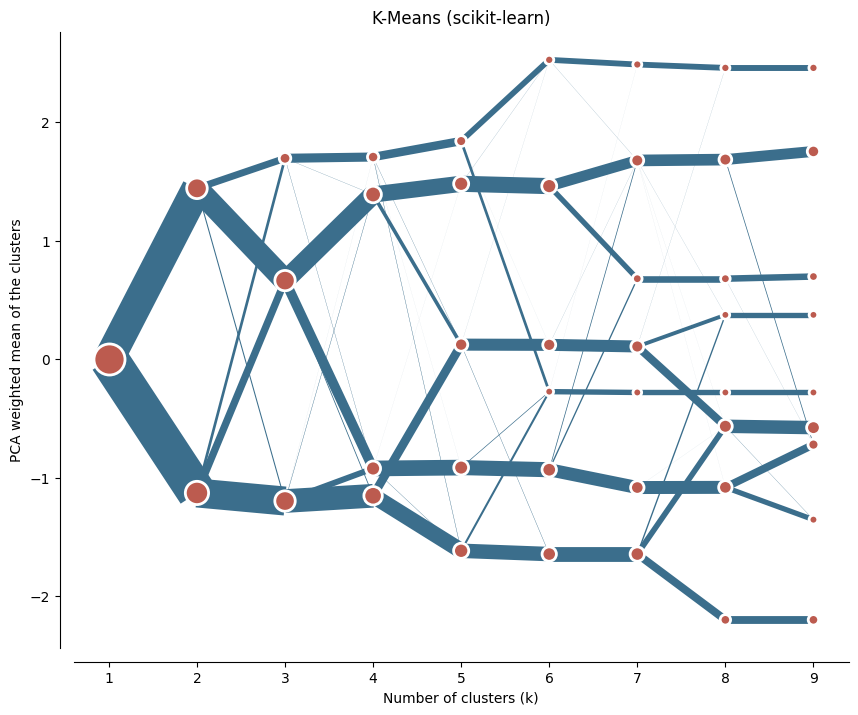

In [ ]:
cgram = Clustergram(range(1, 10), n_init=1000)
cgram.fit(df_ss)

ax = cgram.plot(
    figsize=(10, 8),
    line_style=dict(color=ugg.COLORS[1]),
    cluster_style={"color": ugg.COLORS[2]},
)
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title('K-Means (scikit-learn)')

Text(0.5, 1.0, 'K-Means (scikit-learn)')

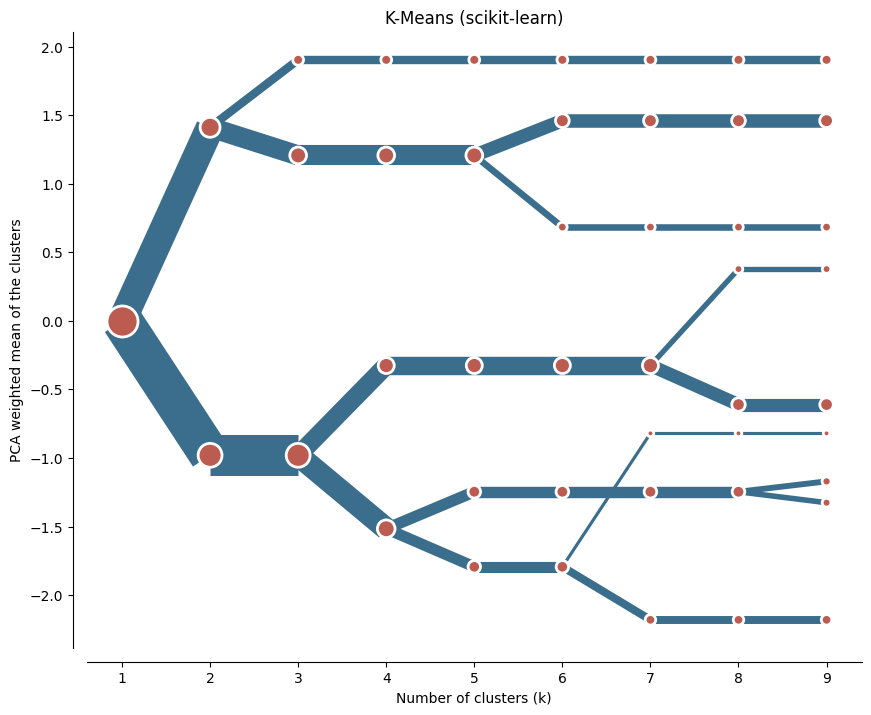

In [ ]:
cgram = Clustergram(range(1, 10), method='hierarchical', linkage='ward')
cgram.fit(df_ss)

ax = cgram.plot(
    figsize=(10, 8),
    line_style=dict(color=ugg.COLORS[1]),
    cluster_style={"color": ugg.COLORS[2]},
)
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title('Hierarchical (scikit-learn)')